# Chapter 2-1

,a,b,c,d
0,1,1,1,1
1,2,2,2,0
2,3,3,0,3
3,4,0,4,4
4,5,0,0,5
5,6,0,6,0
6,7,0,0,0
7,0,8,8,8
8,0,9,0,9
9,0,0,10,10


<Axes: >

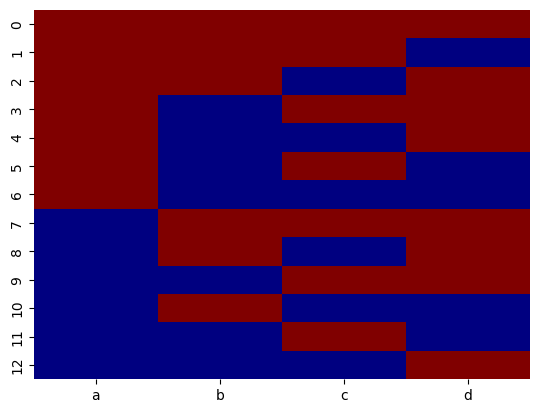

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

table_answer = pd.DataFrame({
    "a": [1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 0, 0, 0,],
    "b": [1, 2, 3, 0, 0, 0, 0, 8, 9, 0, 11, 0, 0,],
    "c": [1, 2, 0, 4, 0, 6, 0, 8,  0, 10, 0, 12, 0,],
    "d": [1, 0, 3, 4, 5, 0, 0,8, 9, 10, 0, 0, 13]
})

display(table_answer)
sns.heatmap(table_answer, vmin=0, vmax=1, cmap="jet", cbar=False)

In [3]:
# Tracking table
table_a_b = pd.DataFrame({
    'a': [1, 2, 3, 4, 5, 6, 7],
    'b': [1, 2, 3, 0, 0, 0, 0,],
})

table_a_c = pd.DataFrame({
    'a': [1, 2, 3, 4, 5, 6, 7],
    'c': [1, 2, 0, 3, 0, 4, 0,],
}).fillna(0)

table_a_d = pd.DataFrame({
    'a': [1, 2, 3, 4, 5, 6, 7],
    'd': [1, 0, 2, 3, 4, 0, 0,],
}).fillna(0)

table_b_c = pd.DataFrame({
    'b': [1, 2, 3, 4, 5, 6],
    'c': [1, 2, 0, 5, 0, 0,],
}).fillna(0)

table_b_d = pd.DataFrame({
    'b': [1, 2, 3, 4, 5, 6],
    'd': [1, 0, 2, 5, 6, 0,],
}).fillna(0)

table_c_d = pd.DataFrame({
    'c': [1, 2, 3, 4, 5, 6, 7],
    'd': [1, 0, 3, 0, 5, 7, 0,],
}).fillna(0)

display(table_a_b)
display(table_a_c)
display(table_a_d)
display(table_b_c)
display(table_b_d)
display(table_c_d)

list_table = [table_a_b, table_a_c, table_a_d, table_b_c, table_b_d, table_c_d]

dict_answer = {
    'a': [1,2,3,4,5,6,7,0,0,0,0,0,0],
    'b': [1,2,3,0,0,0,0,4,5,0,6,0,0],
    'c': [1,2,0,3,0,4,0,5,0,6,0,7,0],
    'd': [1,0,2,3,4,0,0,5,6,7,0,0,8],
}

display(pd.DataFrame(dict_answer).fillna(0))

,a,b
0,1,1
1,2,2
2,3,3
3,4,0
4,5,0
5,6,0
6,7,0


,a,c
0,1,1
1,2,2
2,3,0
3,4,3
4,5,0
5,6,4
6,7,0


,a,d
0,1,1
1,2,0
2,3,2
3,4,3
4,5,4
5,6,0
6,7,0


,b,c
0,1,1
1,2,2
2,3,0
3,4,5
4,5,0
5,6,0


,b,d
0,1,1
1,2,0
2,3,2
3,4,5
4,5,6
5,6,0


,c,d
0,1,1
1,2,0
2,3,3
3,4,0
4,5,5
5,6,7
6,7,0


,a,b,c,d
0,1,1,1,1
1,2,2,2,0
2,3,3,0,2
3,4,0,3,3
4,5,0,0,4
5,6,0,4,0
6,7,0,0,0
7,0,4,5,5
8,0,5,0,6
9,0,0,6,7


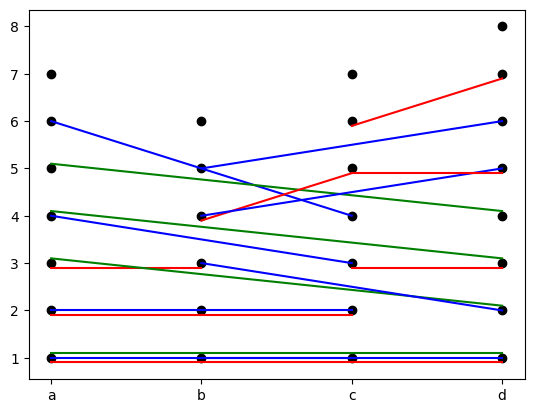

In [4]:
dict_array = {
    "a": np.array([1, 2, 3, 4, 5, 6, 7]),
    "b": np.array([1, 2, 3, 4, 5, 6]),
    "c": np.array([1, 2, 3, 4, 5, 6, 7]),
    "d": np.array([1, 2, 3, 4, 5, 6, 7, 8]),
}

plt.figure()
for x in dict_array.keys():
    for y in dict_array[x]:
        plt.scatter(x, y, color="black")
for table in list_table:
    x_1, x_2 = table.columns
    for idx, row in table.iterrows():
        y_1, y_2 = row[x_1], row[x_2]
        if y_1 == 0 or y_2 == 0:
            continue
        if ord(x_2) - ord(x_1) == 1:
            color="red"
            delta = -0.1
        elif ord(x_2) - ord(x_1) == 2:
            color="blue"
            delta = 0
        elif ord(x_2) - ord(x_1) == 3:
            color="green"
            delta = 0.1
        plt.plot([x_1, x_2], [y_1+delta, y_2+delta], color=color)
plt.show()

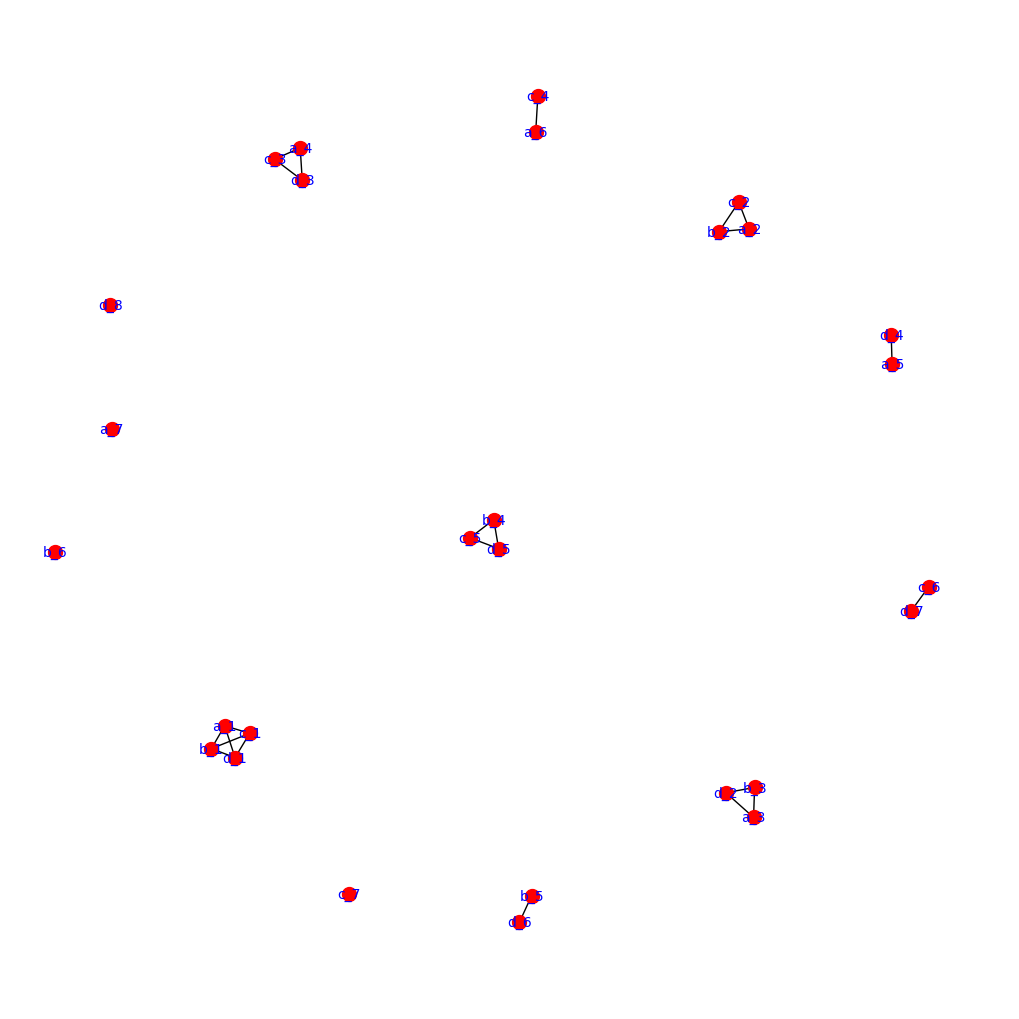

In [20]:
import pandas as pd
import numpy as np
import networkx as nx

list_table = [table_a_b, table_a_c, table_a_d, table_b_c, table_b_d, table_c_d]

G = nx.Graph()

for session in dict_array.keys():
    for roi in dict_array[session]:
        G.add_node(f"{session}_{roi}")


for table in list_table:
    session_pri, session_sec = table.columns
    for _, row in table.dropna().iterrows():
        roi_pri, roi_sec = row[session_pri], row[session_sec]
        if roi_pri == 0 or roi_sec == 0:
            continue
        node1 = f"{session_pri}_{roi_pri}"
        node2 = f"{session_sec}_{roi_sec}"
        G.add_edge(node1, node2)

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=100, font_size=10, font_color="blue", node_color="red", edge_color="black")
plt.show()

In [31]:
list_clique

[['a_5', 'd_4'],
 ['a_4', 'c_3', 'd_3'],
 ['b_1', 'a_1', 'd_1', 'c_1'],
 ['c_7'],
 ['d_5', 'c_5', 'b_4'],
 ['d_6', 'b_5'],
 ['c_4', 'a_6'],
 ['d_2', 'a_3', 'b_3'],
 ['c_6', 'd_7'],
 ['a_2', 'b_2', 'c_2'],
 ['d_8'],
 ['b_6'],
 ['a_7']]

In [48]:
# 部分完全グラフ(クリーク)の抽出
list_clique = list(nx.find_cliques(G))

list_clique
table_clique = pd.DataFrame(columns=sorted(list(set(pd.concat(list_table, axis=1).columns))))

for idx, clique in enumerate(list_clique):
    for node in clique:
        session, roi = node.split("_")
        table_clique.loc[idx, session] = roi
table_clique = table_clique.sort_values(by=table_clique.columns.tolist())
table_clique.index = np.arange(len(table_clique))
display(table_clique)

table_tracking = table_clique.copy()

for idx, row in table_tracking.iterrows():
    for session in row.index:
        if pd.isnull(row[session]):
            table_tracking.loc[idx, session] = 0
        else:
            table_tracking.loc[idx, session] = idx + 1

table_tracking = table_tracking.astype("int16")
display(table_tracking)

,a,b,c,d
0,1,1,1,1
1,2,2,2,NaN
2,3,3,NaN,2
3,4,NaN,3,3
4,5,NaN,NaN,4
5,6,NaN,4,NaN
6,7,NaN,NaN,NaN
7,NaN,4,5,5
8,NaN,5,NaN,6
9,NaN,6,NaN,NaN


,a,b,c,d
0,1,1,1,1
1,2,2,2,0
2,3,3,0,3
3,4,0,4,4
4,5,0,0,5
5,6,0,6,0
6,7,0,0,0
7,0,8,8,8
8,0,9,0,9
9,0,10,0,0


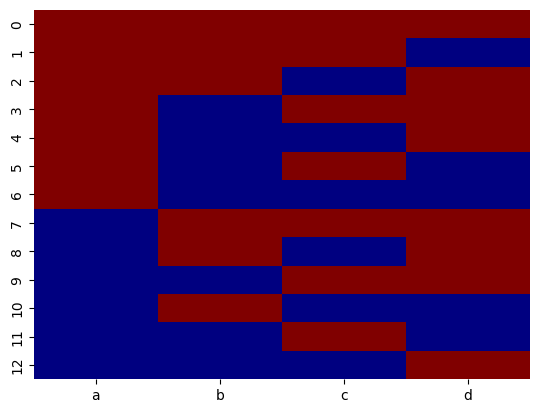

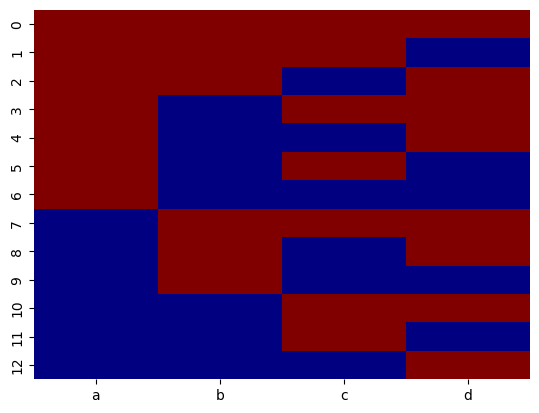

In [50]:
sns.heatmap(table_answer, cmap="jet", cbar=False, vmin=0, vmax=1)
plt.show()

sns.heatmap(table_tracking, cmap="jet", cbar=False, vmin=0, vmax=1)
plt.show()